In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data=r"C:\Users\isheunesu\diabetes.csv"

In [3]:
df=pd.read_csv(data)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
print('No Diabetes',round(df['Outcome'].value_counts()[0]/len(df)*100,2),'% of the datasets')
print('Diabetes',round(df['Outcome'].value_counts()[1]/len(df)*100,2),'% of the datasets')

No Diabetes 65.1 % of the datasets
Diabetes 34.9 % of the datasets


In [9]:
print('No Diabetes',round(df['Outcome'].value_counts()[0]))
print('Diabetes',round(df['Outcome'].value_counts()[1]))

No Diabetes 500
Diabetes 268


Text(0.5, 1.0, 'Class Distributions \n (0:No Diabetes ||1:Diabetes)')

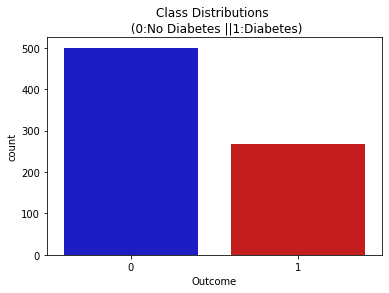

In [10]:
colors=['#0101DF','#DF0101']
sns.countplot('Outcome',data=df,palette=colors)
plt.title('Class Distributions \n (0:No Diabetes ||1:Diabetes)')

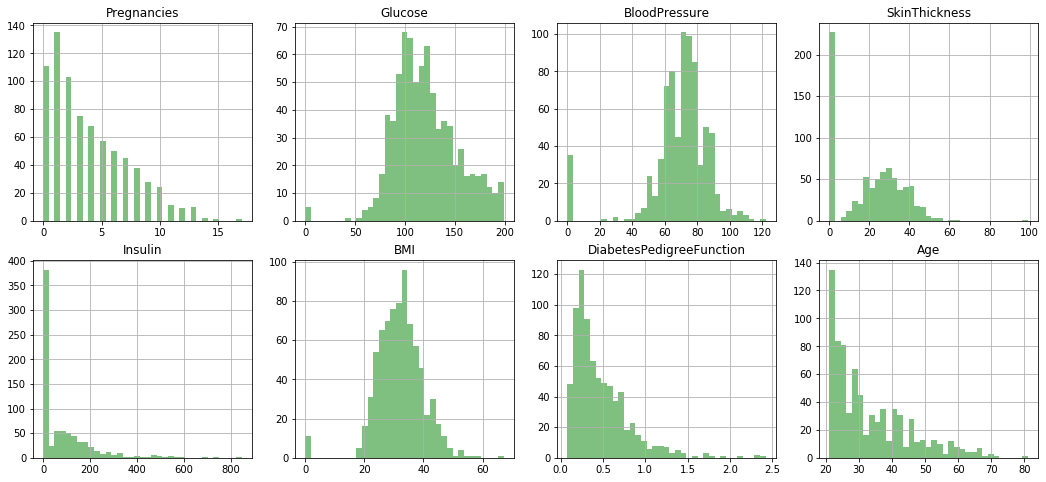

In [11]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
ROWS,COLS=2,4
fig,ax=plt.subplots(ROWS,COLS,figsize=(18,8))
row,col=0,0
for i ,feature in enumerate(features):
    if col==COLS-1:
        row+=1
    col=i % COLS
    
    df[feature].hist(bins=35,color='green',alpha=0.5,ax=ax[row,col]).set_title(feature)
    

In [12]:
df.Glucose.replace(np.nan,df['Glucose'].median(),inplace=True)
df.BloodPressure.replace(np.nan,df['BloodPressure'].median(),inplace=True)
df.SkinThickness.replace(np.nan,df['SkinThickness'].median(),inplace=True)
df.Insulin.replace(np.nan,df['Insulin'].median(),inplace=True)
df.BMI.replace(np.nan,df['BMI'].median(),inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler ,RobustScaler
std_scaler=StandardScaler()
rob_scaler=RobustScaler()
df['scaled_pregnacnies']=std_scaler.fit_transform(df['Pregnancies'].values.reshape(-1,1))
df['scaled_glucose']=std_scaler.fit_transform(df['Glucose'].values.reshape(-1,1))
df['scaled_bloodpressure']=std_scaler.fit_transform(df['BloodPressure'].values.reshape(-1,1))
df['scaled_skinthickness']=std_scaler.fit_transform(df['SkinThickness'].values.reshape(-1,1))
df['scaled_insulin']=std_scaler.fit_transform(df['Insulin'].values.reshape(-1,1))
df['scaled_bmi']=std_scaler.fit_transform(df['BMI'].values.reshape(-1,1))
df['scaled_diabetespedigreefunction']=std_scaler.fit_transform(df['DiabetesPedigreeFunction'].values.reshape(-1,1))
df['scaled_age']=std_scaler.fit_transform(df['Age'].values.reshape(-1,1))
df.drop(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],axis=1,inplace=True)
df.head()

,Outcome,scaled_pregnacnies,scaled_glucose,scaled_bloodpressure,scaled_skinthickness,scaled_insulin,scaled_bmi,scaled_diabetespedigreefunction,scaled_age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,0,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,0,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


<p>Splitting the Data (Original DataFrame) Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

</p>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Diabetes', round(df['Outcome'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Diabetes', round(df['Outcome'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X=df.drop('Outcome',axis=1)
y=df['Outcome']

sss=StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

for train_index ,test_index in sss.split(X,y):
    print("Train:",train_index,"Test:",test_index)
    original_Xtrain,original_Xtest=X.iloc[train_index],X.iloc[test_index]
    original_ytrain,original_ytest=y.iloc[train_index],y.iloc[test_index]
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

#turn into an array
original_Xtrain=original_Xtrain.values
original_Xtest=original_Xtest.values
original_ytrain=original_ytrain.values
original_ytest=original_ytest.values


# See if both the train and test label distribution are similarly distributed
train_unique_label,train_counts_label=np.unique(original_ytrain,return_counts=True)
test_unique_label,test_counts_label=np.unique(original_ytest,return_counts=True)

print('-'*100)
print('Label Distributions:\n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))
    

No Diabetes 65.1 % of the dataset
Diabetes 34.9 % of the dataset
Train: [154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382

## Random Undersampling

In [15]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df=df.sample(frac=1)

#amount of diabetis 268 rows
diabetis_df=df.loc[df['Outcome']==1]
no_diabetis_df=df.loc[df['Outcome']==0][0:268]

normal_distributed_df=pd.concat([diabetis_df,no_diabetis_df])

#shuffle dataframe rows
new_df=normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()


,Outcome,scaled_pregnacnies,scaled_glucose,scaled_bloodpressure,scaled_skinthickness,scaled_insulin,scaled_bmi,scaled_diabetespedigreefunction,scaled_age
84,1,0.342981,0.504055,2.010760,-1.288212,-0.692891,2.133185,-0.739555,0.319855
614,1,2.124780,0.535352,0.253036,0.342717,0.557446,0.521311,0.257084,1.425995
458,1,1.827813,0.848324,0.770014,1.722735,1.364956,0.711690,1.598016,1.511083
64,1,0.936914,-0.215779,-0.160546,-1.288212,-0.692891,0.102477,-0.645932,0.745293
663,1,1.530847,0.754432,0.563223,1.597279,0.435886,0.749766,0.498693,0.575118


Distribution of the samples in the subsample dataset
1    0.5
0    0.5
Name: Outcome, dtype: float64


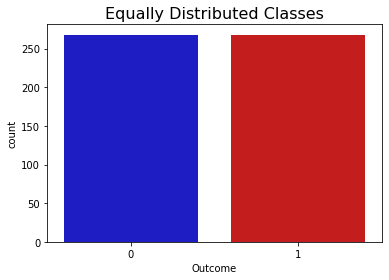

In [16]:
print('Distribution of the samples in the subsample dataset')
print(new_df['Outcome'].value_counts()/len(new_df))

sns.countplot('Outcome',data=new_df,palette=colors)
plt.title('Equally Distributed Classes',fontsize=16)
plt.show()

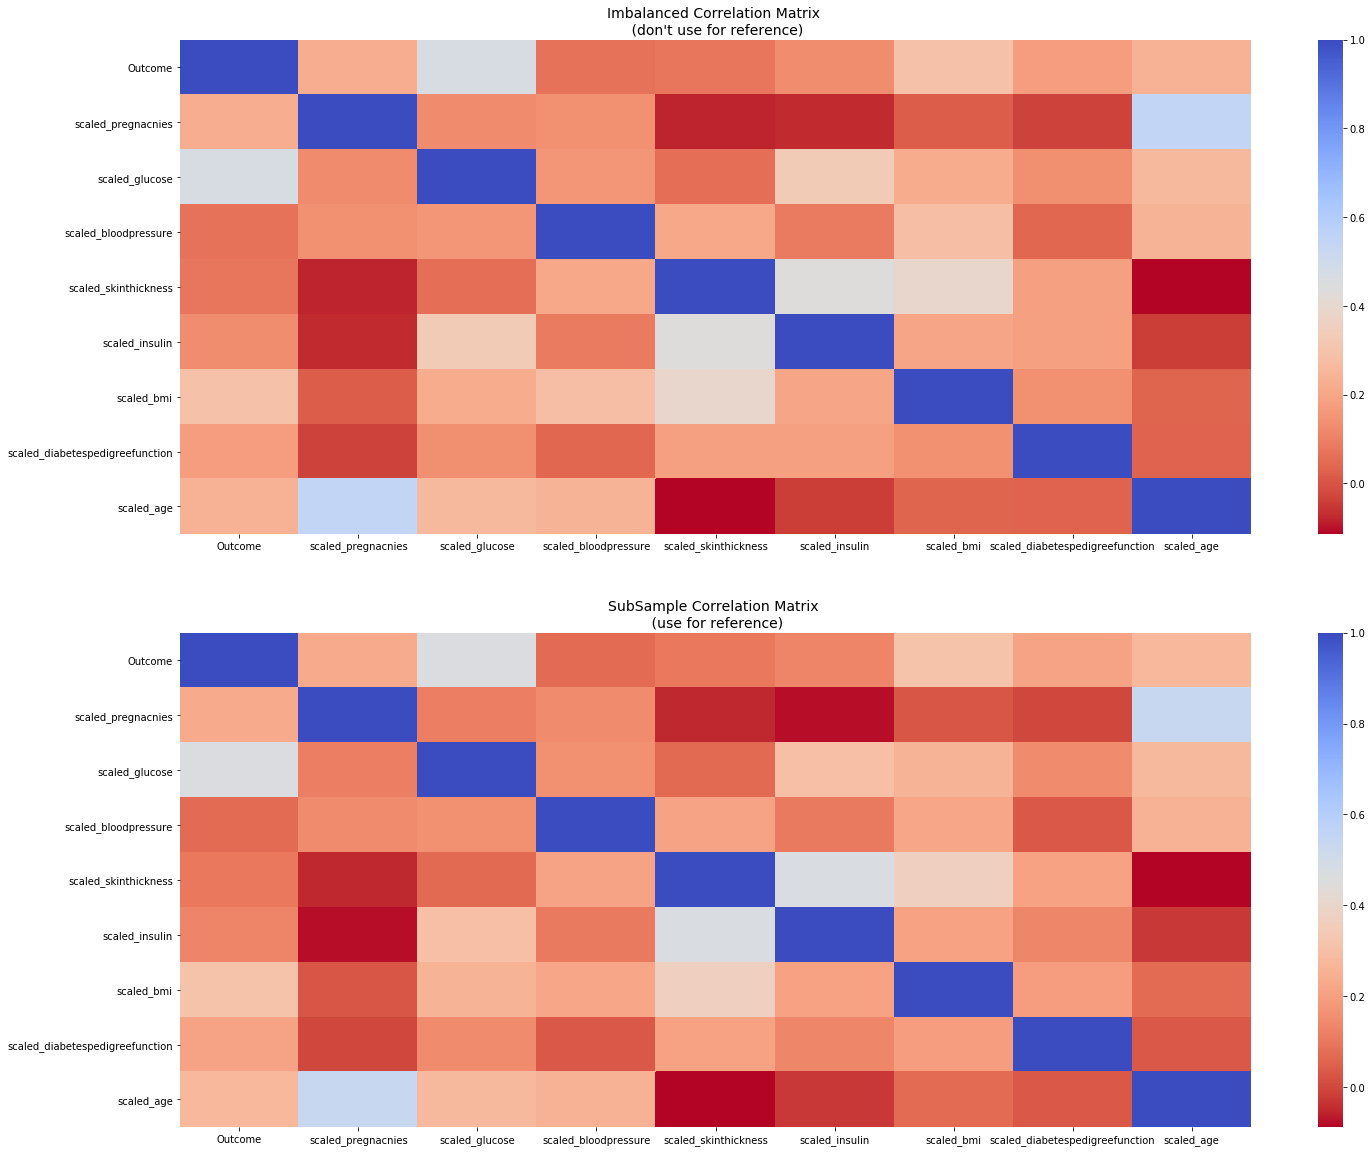

In [17]:
f , (ax1,ax2)=plt.subplots(2,1,figsize=(24,20))
corr=df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [18]:
#Undersampling before cross validating (prone to overfit
X=new_df.drop('Outcome',axis=1)
y=new_df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
#This is explicitly used for undersampling
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [21]:
from xgboost import XGBClassifier
classifiers={
    'LogisticRegression':LogisticRegression(),
    'KNearest':KNeighborsClassifier(),
    'Support Vector Classifier':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoosted':GradientBoostingClassifier(),
    'GaussianNB':GaussianNB(),
    'XGBoostClassifier':XGBClassifier()
}

In [22]:
from sklearn.model_selection import cross_val_score
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    

Classifiers:  LogisticRegression Has a training score of 74.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 67.0 % accuracy score
Classifiers:  SVC Has a training score of 73.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 66.0 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 74.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 69.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 73.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 72.0 % accuracy score


In [57]:
from sklearn.model_selection import GridSearchCV
#logistic Regression
log_reg_params={'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
log_reg=grid_log_reg.best_estimator_

knears_params={"n_neighbors":list(range(2,5,100)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knears=GridSearchCV(KNeighborsClassifier(),knears_params)
grid_knears.fit(X_train,y_train)
knears_clf=grid_knears.best_estimator_

#Support Vector Classifier
svm_params={'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}
grid_svc=GridSearchCV(SVC(),svm_params)
grid_svc.fit(X_train,y_train)

svc=grid_svc.best_estimator_
 #DecisionTree Classifier
tree_params={"criterion":['gini','entropy'],'max_depth':list(range(2,4,10)),'min_samples_leaf':list(range(5,7,10))}

grid_tree=GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,y_train)

tree_clf=grid_tree.best_estimator_

#AdaBoostClassier
adaboostclassifier_params={'n_estimators':[10,100,200,300,400,500],'learning_rate':[0.01,0.001,0.0001,0.1,1]}
adaboost_grid=GridSearchCV(AdaBoostClassifier(),adaboostclassifier_params)
adaboost_grid.fit(X_train,y_train)

adaboost_clf=adaboost_grid.best_estimator_




gradientboosting_params={'loss':['deviance','exponential'],'learning_rate':[0.01,0.001,0.0001,0.1,1],'n_estimators':[10,100,200,300,400,500]}
gradientboosting_grid=GridSearchCV(GradientBoostingClassifier(),gradientboosting_params)
gradientboosting_grid.fit(X_train,y_train)

gradientboosting_clf=gradientboosting_grid.best_estimator_

xgboost_params={'eta':[0.3,0.01,0.1,0.001,1],'gamma':[0.01,0.1,0.01,1],'max_depth':[2,3,5,6,7,10],'max_delta_step':[0.1,0.01,0.001,0.0001,1],'min_child_weight':[0.01,0.001,0.0001,1,0.1]}
xgboost_grid=GridSearchCV(XGBClassifier(),xgboost_params)
xgboost_grid.fit(X_train,y_train)

xgboost_clf=xgboost_grid.best_estimator_


In [58]:
log_reg_score=cross_val_score(log_reg,X_train,y_train,cv=5)
print('Logistic Regression Cross Validation Score:',round(log_reg_score.mean()*100,2).astype(str)+'%')

knears_score=cross_val_score(grid_knears,X_train,y_train,cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')


adaboost_score=cross_val_score(adaboost_clf,X_train,y_train,cv=5)
print('AdaBoostClassifier Cross Validation Score', round(adaboost_score.mean() * 100, 2).astype(str) + '%')

gradientboosting_score=cross_val_score(gradientboosting_clf,X_train,y_train,cv=5)
print('GradientBoostingClassifier Cross Validation Score', round(gradientboosting_score.mean() * 100, 2).astype(str) + '%')

xgboost_score=cross_val_score(xgboost_clf,X_train,y_train,cv=5)
print('XgBoost Cross Validation Score', round(xgboost_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score: 73.83%
Knears Neighbors Cross Validation Score 66.11%
Support Vector Classifier Cross Validation Score 72.41%
DecisionTree Classifier Cross Validation Score 65.65%
AdaBoostClassifier Cross Validation Score 74.53%
GradientBoostingClassifier Cross Validation Score 71.49%
XgBoost Cross Validation Score 71.49%


In [59]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)

adaboost_pred = cross_val_predict(adaboost_clf, X_train, y_train, cv=5)

gradientboosting_pred = cross_val_predict(gradientboosting_clf, X_train, y_train, cv=5)


xgboost_pred=cross_val_predict(xgboost_clf,X_train,y_train,cv=5)

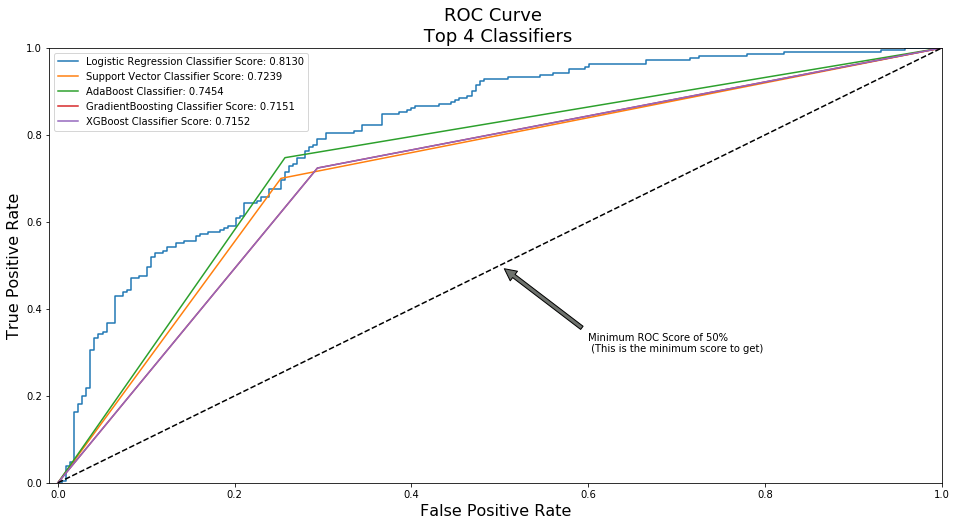

In [60]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train,svc_pred)
adaboost_fpr, adaboost_tpr, adaboost_threshold = roc_curve(y_train, adaboost_pred)
gradientboosting_fpr, gradientboosting_tpr, gradientboosting_threshold = roc_curve(y_train, gradientboosting_pred)
xgboost_fpr,xgboost_tpr,xgboost_threshold=roc_curve(y_train,xgboost_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, cvc_tpr, adaboost_fpr, adaboost_tpr, gradientboosting_fpr, gradientboosting_tpr,xgboost_tpr,xgboost_fpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(adaboost_fpr, adaboost_tpr, label='AdaBoost Classifier: {:.4f}'.format(roc_auc_score(y_train, adaboost_pred)))
    plt.plot(gradientboosting_fpr, gradientboosting_tpr, label='GradientBoosting Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gradientboosting_pred)))
    plt.plot(gradientboosting_fpr, gradientboosting_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, xgboost_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, adaboost_fpr, adaboost_tpr, gradientboosting_fpr, gradientboosting_tpr,xgboost_tpr,xgboost_fpr)
plt.show()

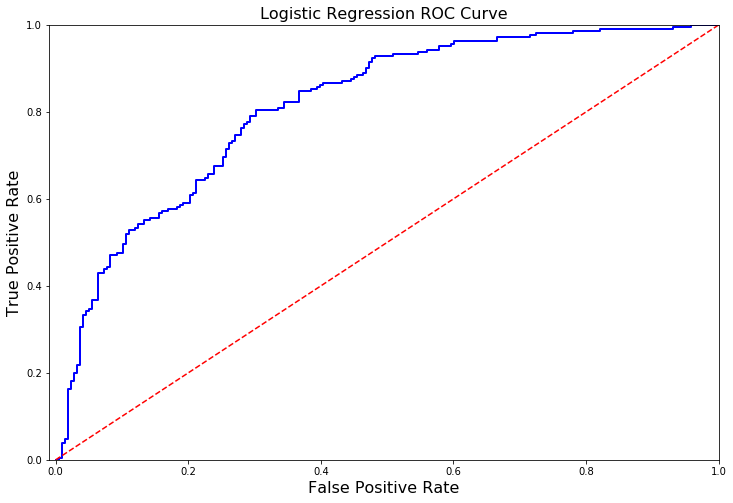

In [61]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 615 | Length of y (train): 615
Length of X (test): 153 | Length of y (test): 153
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7626016260162601
precision: 0.6382292803914019
recall: 0.7441860465116278
f1: 0.6869608954055106
---------------------------------------------------------------------------------------------------------------------------------------


In [63]:
labels = ['No Diabetes', 'Diabetes']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

 No Diabetes       0.84      0.77      0.80       100
    Diabetes       0.62      0.72      0.67        53

    accuracy                           0.75       153
   macro avg       0.73      0.74      0.73       153
weighted avg       0.76      0.75      0.76       153



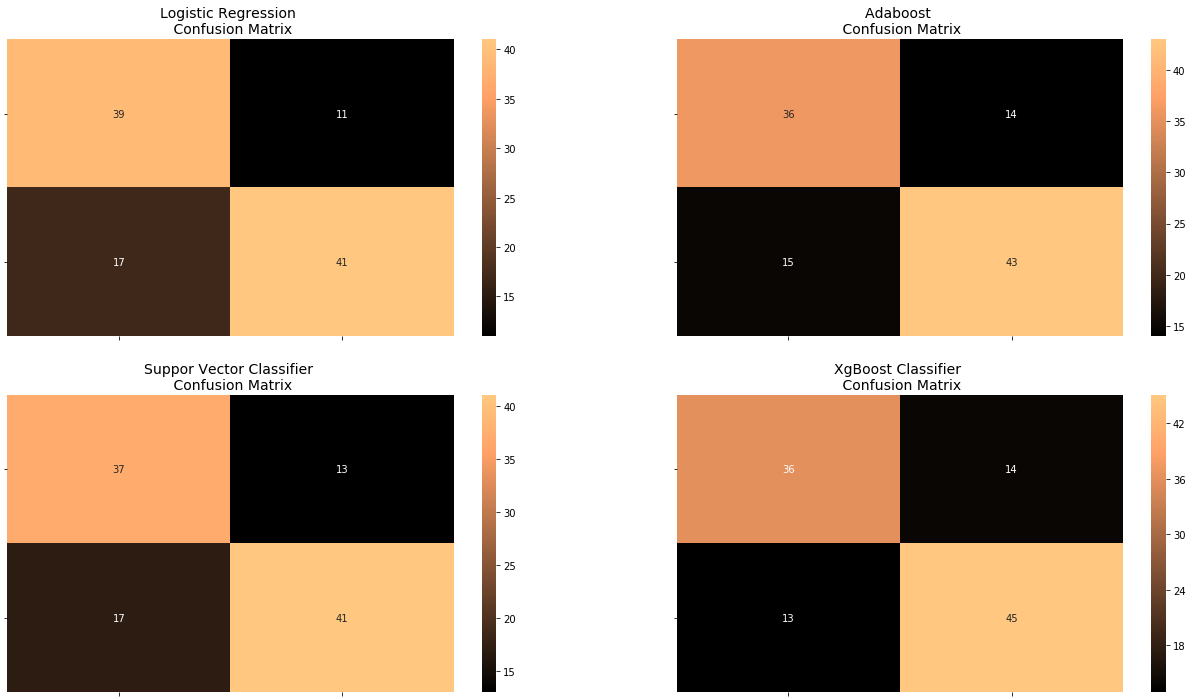

In [64]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg=log_reg_sm.fit(X_train,y_train)
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_adaboost = adaboost_clf.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_xgboost = xgboost_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
adaboost_cf = confusion_matrix(y_test, y_pred_adaboost)
svc_cf = confusion_matrix(y_test, y_pred_svc)
xgboost_cf = confusion_matrix(y_test, y_pred_xgboost)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(adaboost_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("Adaboost \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(xgboost_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("XgBoost Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()